### <b>실전 프로젝트 - CNN을 활용한 풍경(Scene) 이미지 분류</b>

* 한 장의 풍경 이미지가 주어졌을 때, 어떠한 카테고리(category)에 속하는지 맞히는 <b>분류 모델</b>을 만드세요.
* 다음의 세 가지 대표적인 CNN 모델을 실습합니다.
    1. [LeNet (1998)](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
    2. [AlexNet (2012 NIPS)](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)
    3. [ResNet (2016 CVPR)](https://arxiv.org/abs/1512.03385)
* 성능을 올릴 수 있는 두 가지 심화 기법을 실습합니다.
    1. [Mixup (ICLR 2018)](https://arxiv.org/abs/1710.09412): 데이터 증진 기법의 일종으로 정확도를 높입니다.
    2. Transfer Learning: 학습 속도와 정확도를 모두 향상시킬 수 있습니다.
* 본 프로젝트는 <b>총 7개의 문제</b>로 구성됩니다.
    * <b>Problem</b>이라고 명시된 부분의 소스코드만 작성합니다.
    * <b>알아보기</b>라고 명시된 부분은 단순히 읽고 실행하면 됩니다.
    * 단계적으로 문제를 풀어나가는 과정에서 CNN 기반의 고성능 분류 모델을 학습하는 방법을 이해할 수 있습니다.
* (참고) 본 실습 코드에서는 빠른 결과 도출을 위해 30~50 epoch 정도만 학습합니다.
    * 풍경 데이터셋에 대하여 완전히 학습시키기 위해서는 100 epoch 이상의 학습이 필요합니다.

#### <b>(알아보기) 지난 프로젝트 Review</b>

* 지난 프로젝트에서는 Scene Classification 데이터셋에 대하여 간단한 기계학습 모델을 학습했습니다.
    1. 선형 분류 모델(Linear Models for Classification)
    2. KNN (K-Nearest Neighbors)
* 하지만, 두 기법 모두 정확도(accuracy)가 <b>60% 미만</b>으로 낮게 나온다는 <b>한계점</b>이 존재했습니다.
* 본 실습에서는 CNN을 이용해 정확도를 <b>최소한 90% 이상으로</b> 높입니다.
    * 실제로 현업에서 많이 사용되는 테크닉을 이용해 최대한 정확도를 끌어올려 봅시다.

#### <b>Problem 1. 데이터셋 다운로드 및 분석하기</b>

* [PyTorch용 Scene Classification 데이터셋 저장소](https://github.com/ndb796/Scene-Classification-Dataset-Split)
    * 참고: [원본 Kaggle 데이터셋 링크](https://www.kaggle.com/nitishabharathi/scene-classification)
    * 본 데이터셋은 <b>저작권이 없는(No Copyright)</b> [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) 라이센스를 따라므로, 자유롭게 변형할 수 있습니다.
* PyTorch에서 곧바로 불러와 사용할 수 있도록 구성된 데이터셋입니다.
* 다음의 명령어를 이용해 데이터셋을 다운로드할 수 있습니다.

<pre>
# 깃허브에서 데이터셋 다운로드하기
!git clone https://github.com/ndb796/Scene-Classification-Dataset-Split 
# 폴더 안으로 이동
%cd Scene-Classification-Dataset-Split 
</pre>

In [ ]:
# 깃허브에서 데이터셋 다운로드하기

# 폴더 안으로 이동


#### <b>(알아보기) 데이터셋 설명</b>

* 본 PyTorch용 장면(scene) 데이터셋은 17,034개의 다양한 <b>자연 경치(scene)</b> 이미지로 구성되어 있습니다.
* 총 6개의 클래스(class)로 구성됩니다.

<pre>
클래스 0. 빌딩(buildings)
클래스 1. 숲(forests)
클래스 2. 빙하(glacier)
클래스 3. 산(mountains)
클래스 4. 바다(sea)
클래스 5. 거리(street)
</pre>

* 각 이미지는 공통적으로 64 X 64 크기를 가집니다.
* 데이터셋 폴더 구성은 다음과 같습니다.

<pre>
Dataset/
    train/
        buildings/
        forests/
        glacier/
        mountains/
        sea/
        streat/
    val/
        buildings/
        forests/
        glacier/
        mountains/
        sea/
        streat/
</pre>

#### <b>(알아보기) 클래스별 학습 이미지 개수 출력하기</b>

* 클래스별 데이터의 개수를 계산합니다.
    * os 라이브러리의 os.listdir()를 이용하여 이미지 폴더에 존재하는 파일 이름 목록을 얻을 수 있습니다.
    * 클래스의 개수는 6개입니다.
* 총 학습 데이터의 개수는 13,627개입니다.

<pre>
클래스 0. 빌딩(buildings): 2,105개
클래스 1. 숲(forests): 2,205개
클래스 2. 빙하(glacier): 2,363개
클래스 3. 산(mountains): 2,438개
클래스 4. 바다(sea): 2,224개
클래스 5. 거리(street): 2,292개
</pre>

* 총 검증 데이터의 개수는 3,407개입니다.

<pre>
클래스 0. 빌딩(buildings): 523개
클래스 1. 숲(forests): 540개
클래스 2. 빙하(glacier): 594개
클래스 3. 산(mountains): 599개
클래스 4. 바다(sea): 560개
클래스 5. 거리(street): 591개
</pre>

In [1]:
import os
path = os.getcwd()

classes = ['buildings', 'forests', 'glacier', 'mountains', 'sea', 'street']
train_path = os.path.join(path,"train")
val_path = os.path.join(path,"val")

print("[ 학습 데이터셋 ]")
for i in range(6):
    print(f'클래스 {i}의 개수: {len(os.listdir(os.path.join(train_path, classes[i])))}')

print("[ 검증 데이터셋 ]")
for i in range(6):
    print(f'클래스 {i}의 개수: {len(os.listdir(os.path.join(val_path, classes[i])))}')

[ 학습 데이터셋 ]
클래스 0의 개수: 2105
클래스 1의 개수: 2205
클래스 2의 개수: 2363
클래스 3의 개수: 2438
클래스 4의 개수: 2224
클래스 5의 개수: 2292
[ 검증 데이터셋 ]
클래스 0의 개수: 523
클래스 1의 개수: 540
클래스 2의 개수: 594
클래스 3의 개수: 599
클래스 4의 개수: 560
클래스 5의 개수: 591


#### <b>(알아보기) 데이터셋 불러오기</b>

* PyTorch의 <b>ImageFolder 라이브러리</b>를 이용하여 <b>자신만의 데이터셋</b>을 불러올 수 있습니다.
* ImageFolder 라이브러리는 다음과 같이 <b>계층적인 폴더 구조</b>에서 데이터셋을 불러올 때 사용할 수 있습니다.
    * 각 클래스명(class name)으로 된 폴더에 여러 장의 이미지가 들어가 있는 구조입니다.

<pre>
dataset/
    class 0/
        0.jpg
        1.jpg
        ...
    class 1/
        0.jpg
        1.jpg
        ...
    ...
    class 9/
        0.jpg
        1.jpg
        ...
</pre>

* 기본적인 <b>데이터 증진(data augmentation)</b> 기법을 사용합니다.
    * [RandomResizedCrop()](https://pytorch.org/vision/stable/transforms.html): 학습 시기에 랜덤으로 이미지의 일부를 잘라내어 특정 크기로 변형합니다.
    * [RandomHorizontalFlip()](https://pytorch.org/vision/stable/transforms.html): 학습 시기에 랜덤으로 이미지를 좌우 반전합니다.
* <b>정규화(normalization)를</b> 진행합니다.
    * 일반적으로 많이 사용되는 ImageNet 데이터셋의 설정을 이용합니다.

In [2]:
import torch
from torchvision import datasets, transforms


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device object

transforms_train = transforms.Compose([
    transforms.RandomResizedCrop((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_val = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_path, transforms_train)
val_dataset = datasets.ImageFolder(val_path, transforms_val)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=2)

print('Training dataset size:', len(train_dataset))
print('Validation dataset size:', len(val_dataset))

class_names = train_dataset.classes
print('Class names:', class_names)

C:\Users\USER\anaconda3\envs\SU\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Training dataset size: 13627
Validation dataset size: 3407
Class names: ['buildings', 'forests', 'glacier', 'mountains', 'sea', 'street']


#### <b>(알아보기) 이미지 시각화하기</b>

* PyTorch로 불러온 데이터(torch.Tensor 객체)를 시각화해 봅시다.
* Google Colab에 출력하기 위해서 NumPy 형태로 변형한 뒤에 Matplotlib을 이용합니다.
    * torch.Tensor는 (Channel, Height, Width) 형식을 가집니다.
    * numpy 객체는 (Height, Width, Channel) 형식을 가집니다.

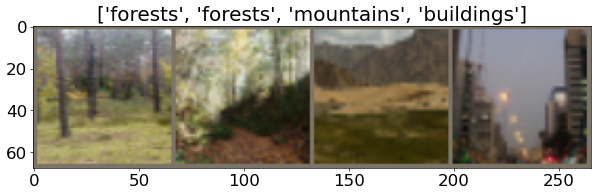

In [3]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt


# 화면에 출력되는 이미지 크기를 적절하게 조절하기
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})


def imshow(image, title):
    # torch.Tensor => numpy 변환하기
    image = image.numpy().transpose((1, 2, 0))
    # 이미지 정규화(normalization) 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    # 화면에 이미지 출력하기
    plt.imshow(image)
    plt.title(title)
    plt.show()


# 학습 데이터셋에서 하나의 배치를 불러와 보기
iterator = iter(train_dataloader)

# 현재 배치에 포함된 이미지를 출력하기
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs[:4])
imshow(out, title=[class_names[x] for x in classes[:4]])

#### <b>Problem 2. Convolution 연산 이해하기</b>

* Convolution 연산의 동작 원리를 이해할 필요가 있습니다.
* <b>[그림 예시]</b> 아래 그림에서는 stride가 1이고, padding이 0일 때의 Convolution 연산 예시를 보입니다.

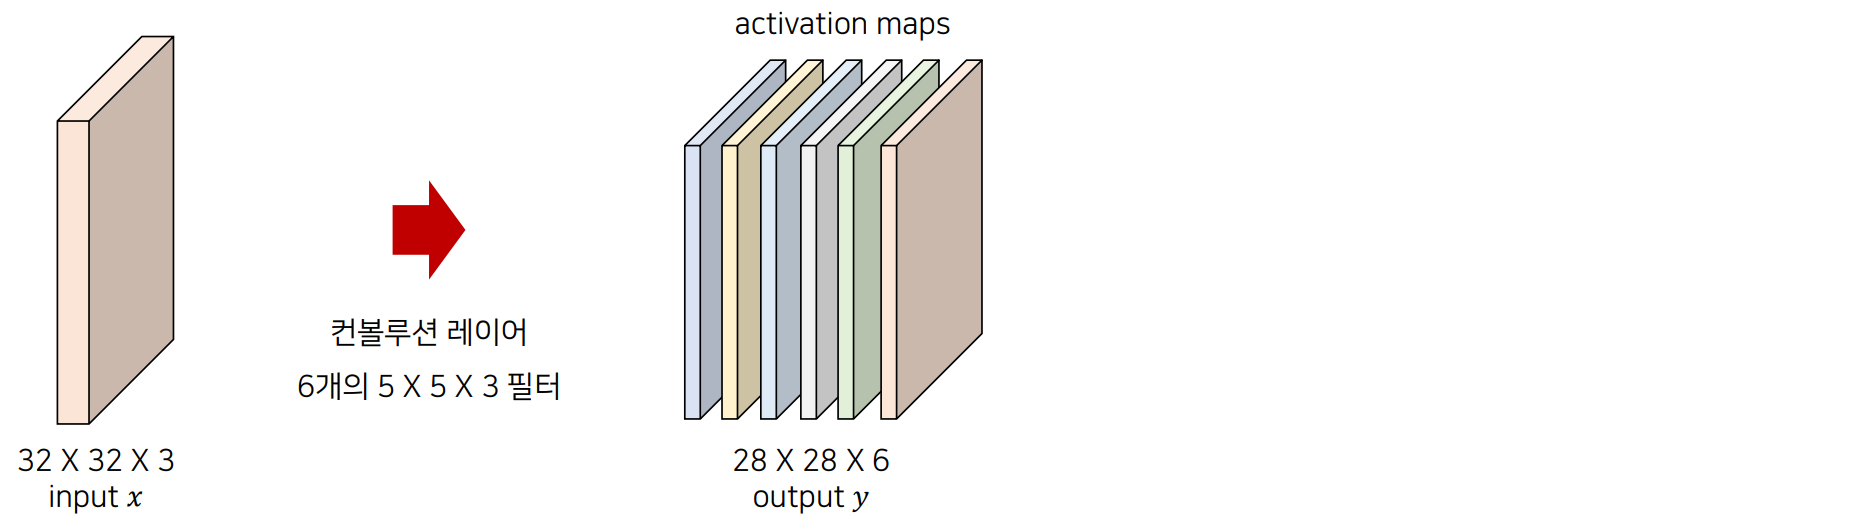

<hr>

* 입력 데이터의 높이: $height$
* 입력 데이터의 너비: $width$
* 필터의 높이: $filter\_height$
* 필터의 너비: $filter\_width$
* 스트라이드(stride): $stride$
* 패딩 크기: $padding$

<hr>

* Convolution 연산 이후의 출력 차원은 다음과 같은 공식으로 계산할 수 있습니다. (나누기할 때 소수점 아래 버림)
    * 출력 높이(output height) = $(height + 2 * padding - filter_{height}) / stride + 1$
    * 출력 너비(output width) = $(width + 2 * padding - filter_{width}) / stride + 1$

* <b>[문제]</b> 다음의 각 경우에 대하여 Convolution 연산을 수행한 뒤의 출력 차원을 쓰세요.
    1. $height=32$, $width=32$, $filter_{height}=5$, $filter_{width}=5$, $stride=2$, $padding=2$일 때 → {(16,16)}
    2. $height=64$, $width=64$, $filter_{height}=3$, $filter_{width}=3$, $stride=1$, $padding=1$일 때 → {(64,64)}
    3. $height=16$, $width=16$, $filter_{height}=4$, $filter_{width}=4$, $stride=2$, $padding=1$일 때 → {(8,8)}
    4. $height=60$, $width=45$, $filter_{height}=8$, $filter_{width}=5$, $stride=3$, $padding=1$일 때 → {(19,15)}

* (Hint) 다음과 같은 Python 코드를 사용하여 간단히 계산할 수 있습니다.

<pre>
height = 16
width = 16
filter_height = 4
filter_width = 4
stride = 2
padding = 1

output_height = (height + 2 * padding - filter_height) // stride + 1
output_width = (width + 2 * padding - filter_width) // stride + 1

print('출력 높이:', output_height, '출력 너비:', output_width)
</pre>

* 실행 결과 예시

<pre>
출력 높이: 8 출력 너비: 8
</pre>

In [4]:
def Output_Dim(height, width, filter_height, filter_width, stride, padding):
    output_height = (height + 2 * padding - filter_height) // stride + 1
    output_width = (width + 2 * padding - filter_width) // stride + 1
    return output_height, output_width

print("출력 높이 : %d, 출력 너비 : %d"%(Output_Dim(32,32,5,5,2,2)))
print("출력 높이 : %d, 출력 너비 : %d"%(Output_Dim(64,64,3,3,1,1)))
print("출력 높이 : %d, 출력 너비 : %d"%(Output_Dim(16,16,4,4,2,1)))
print("출력 높이 : %d, 출력 너비 : %d"%(Output_Dim(60,45,8,5,3,1)))

출력 높이 : 16, 출력 너비 : 16
출력 높이 : 64, 출력 너비 : 64
출력 높이 : 8, 출력 너비 : 8
출력 높이 : 19, 출력 너비 : 15


#### <b>(알아보기) Lenet 아키텍처 이해하기</b>

* 기본적인 LeNet 아키텍처를 이해할 수 있습니다.
    * Convolutional Neural Network를 최초로(1998년) 적용한 간단한 아키텍처입니다.
    * Convolution 연산과 Pooling 연산이 사용됩니다.
* <b>아래의 표</b>와 같은 아키텍처를 PyTorch로 구현한 것을 확인해 봅시다.
    * 원본 논문과 완전히 동일하지는 않지만, 핵심 아이디어를 잘 표현한 아키텍처입니다.
    * PyTorch에서는 모델에 별도로 Softmax 레이어를 두지 않고, 학습할 때 nn.CrossEntropyLoss()를 사용하는 것이 일반적입니다.

Layer | Type | Specification
:-: | :-: | ---
1 | Input | image size: 3 X 64 X 64
2 | Convolution | # of kernel: 20, kernel size: 5 X 5, stride: 1, zero padding: 0
3 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
4 | Convolution | # of kernel: 50, kernel size: 5 X 5, stride: 1, zero padding: 0
5 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
6 | Fully Connected | # of neuron: 500
7 | Activation | ReLU
8 | Fully Connected | # of neuron: 6
9 | Softmax | 6 classes



In [5]:
import torch.nn as nn
import torch.nn.functional as F


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # → 차원(dimension): (3 x 64 x 64)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=20, kernel_size=5, stride=1, padding=0)
        # → 차원(dimension): (20 x 60 x 60)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # → 차원(dimension): (20 x 30 x 30)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1, padding=0)
        # → 차원(dimension): (50 x 26 x 26)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # → 차원(dimension): (50 x 13 x 13)
        self.fc1 = nn.Linear(50 * 13 * 13, 500)
        # → 차원(dimension): (500)
        self.fc2 = nn.Linear(500, 6)
        # → 차원(dimension): (6)

    def forward(self, x):
        x = self.pool1(self.conv1(x))
        x = self.pool2(self.conv2(x))
        x = torch.flatten(x, 1) # 배치(batch)를 제외한 모든 차원 flatten하기
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#### <b>(알아보기) 학습 및 평가 함수 이해하기</b>

* 별도의 학습(train) 함수와 평가(validate) 함수를 작성합니다.

In [6]:
def train(net, epoch, optimizer, criterion, train_dataloader):
    print('[ Train epoch: %d ]' % epoch)
    net.train() # 모델을 학습 모드로 설정
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(train_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad() # 기울기(gradient) 초기화

        outputs = net(inputs) # 모델 입력하여 결과 계산
        loss = criterion(outputs, targets) # 손실(loss) 값 계산
        loss.backward() # 역전파를 통해 기울기(gradient) 계산

        optimizer.step() # 계산된 기울기를 이용해 모델 가중치 업데이트
        train_loss += loss.item()
        _, predicted = outputs.max(1)

        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print('Train accuarcy:', 100. * correct / total)
    print('Train average loss:', train_loss / total)
    return (100. * correct / total, train_loss / total)


def validate(net, epoch, val_dataloader):
    print('[ Validation epoch: %d ]' % epoch)
    net.eval() # 모델을 평가 모드로 설정
    val_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(val_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = net(inputs) # 모델 입력하여 결과 계산
        val_loss += criterion(outputs, targets).item()
        _, predicted = outputs.max(1)

        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print('Accuarcy:', 100. * correct / total)
    print('Average loss:', val_loss / total)
    return (100. * correct / total, val_loss / total)

#### <b>(알아보기) LeNet 학습하기</b>

* 앞서 정의한 LeNet 네트워크를 학습합니다.
* 학습률(learning rate)을 수정해보면서 결과를 확인해 봅시다.
    * 만약 학습률이 너무 크다면, 발산하여 손실(loss) 값이 NaN으로 나오며 학습이 안 될 수 있습니다.

In [11]:
import time
import torch.optim as optim
#learning rate : 0.1~0.007: NaN 나옴(0.006부터 가능)
epoch = 30
List_LR = [5e-3, 1e-3, 5e-4, 1e-4, 5e-5, 1e-5, 5e-6, 1e-6]
List_LR_name = [str(i).replace("-","_").replace(".","_") for i in List_LR]
print(List_LR_name)
Train_acc = np.zeros((epoch,len(List_LR)))
Train_loss = np.zeros((epoch,len(List_LR)))
Val_acc = np.zeros((epoch,len(List_LR)))
Val_loss = np.zeros((epoch,len(List_LR)))
for l,learning_rate in enumerate(List_LR):
    net = LeNet()
    net = net.to(device)
    lr_name =List_LR_name[l]
    file_name = "LeNet_"+lr_name+".pt"
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)
    start_time = time.time() # 시작 시간
    for i in range(epoch):
        train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
        val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)
        # 학습된 모델 저장하기
        state = {
            'net': net.state_dict()
        }
        path_checkpoint = os.path.join(path,'checkpoint')
        if not os.path.isdir(path_checkpoint):
            os.mkdir(path_checkpoint)
            
        torch.save(state, os.path.join(path_checkpoint,file_name))
        print(f'Model saved! (time elapsed: {time.time() - start_time})')
        # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
        Train_acc[i,l]=train_acc
        Train_loss[i,l]=train_loss
        Val_acc[i,l]=val_acc
        Val_loss[i,l]=val_loss

['0_005', '0_001', '0_0005', '0_0001', '5e_05', '1e_05', '5e_06', '1e_06']
[ Train epoch: 0 ]
Train accuarcy: 50.03302267557056
Train average loss: 0.03911100846179524
[ Validation epoch: 1 ]
Accuarcy: 65.10126210742588
Average loss: 0.02945583913555095
Model saved! (time elapsed: 6.573010683059692)
[ Train epoch: 1 ]
Train accuarcy: 57.94378806780656
Train average loss: 0.034080081227643305
[ Validation epoch: 2 ]
Accuarcy: 68.62342236571764
Average loss: 0.026758495220733522
Model saved! (time elapsed: 13.190762042999268)
[ Train epoch: 2 ]
Train accuarcy: 60.32875908123578
Train average loss: 0.03298013143549226
[ Validation epoch: 3 ]
Accuarcy: 69.00498972703258
Average loss: 0.02667046643822012
Model saved! (time elapsed: 19.914668798446655)
[ Train epoch: 3 ]
Train accuarcy: 61.26073236956043
Train average loss: 0.03201901384308708
[ Validation epoch: 4 ]
Accuarcy: 65.57088347519812
Average loss: 0.02859727565515136
Model saved! (time elapsed: 26.7017765045166)
[ Train epoch: 4 ]

Train accuarcy: 64.3501871284949
Train average loss: 0.02923227097026371
[ Validation epoch: 7 ]
Accuarcy: 73.61314939829762
Average loss: 0.023759549800202683
Model saved! (time elapsed: 44.88719916343689)
[ Train epoch: 7 ]
Train accuarcy: 66.01599765172085
Train average loss: 0.028460141239367815
[ Validation epoch: 8 ]
Accuarcy: 73.67185206926915
Average loss: 0.023166444168994948
Model saved! (time elapsed: 51.427063941955566)
[ Train epoch: 8 ]
Train accuarcy: 66.76451163132018
Train average loss: 0.027969766699350123
[ Validation epoch: 9 ]
Accuarcy: 75.55033754035809
Average loss: 0.022415524542699086
Model saved! (time elapsed: 57.96589374542236)
[ Train epoch: 9 ]
Train accuarcy: 67.13143024877083
Train average loss: 0.02747966712277153
[ Validation epoch: 10 ]
Accuarcy: 74.22952744349868
Average loss: 0.022512568838266744
Model saved! (time elapsed: 64.62942552566528)
[ Train epoch: 10 ]
Train accuarcy: 68.46701401629119
Train average loss: 0.026840216042999476
[ Validation 

Train accuarcy: 67.02135466353563
Train average loss: 0.02757110387368992
[ Validation epoch: 13 ]
Accuarcy: 73.93601408864103
Average loss: 0.023105365783194835
Model saved! (time elapsed: 85.64044070243835)
[ Train epoch: 13 ]
Train accuarcy: 67.36625816393924
Train average loss: 0.027255864178188708
[ Validation epoch: 14 ]
Accuarcy: 74.84590548869974
Average loss: 0.021962120477356167
Model saved! (time elapsed: 92.16818976402283)
[ Train epoch: 14 ]
Train accuarcy: 67.89462097306817
Train average loss: 0.027037981295345938
[ Validation epoch: 15 ]
Accuarcy: 74.84590548869974
Average loss: 0.02232131871933597
Model saved! (time elapsed: 98.79855728149414)
[ Train epoch: 15 ]
Train accuarcy: 68.45233727159317
Train average loss: 0.026571210520523105
[ Validation epoch: 16 ]
Accuarcy: 74.9633108306428
Average loss: 0.02203562036965787
Model saved! (time elapsed: 105.46503710746765)
[ Train epoch: 16 ]
Train accuarcy: 69.12746752770235
Train average loss: 0.025970673236544593
[ Valida

Train accuarcy: 62.66969986057092
Train average loss: 0.03105571106925892
[ Validation epoch: 19 ]
Accuarcy: 70.00293513354858
Average loss: 0.025902329528300266
Model saved! (time elapsed: 123.60189127922058)
[ Train epoch: 19 ]
Train accuarcy: 62.53760915828869
Train average loss: 0.030915815096971548
[ Validation epoch: 20 ]
Accuarcy: 69.59201643674787
Average loss: 0.02629025643054502
Model saved! (time elapsed: 130.14531421661377)
[ Train epoch: 20 ]
Train accuarcy: 63.36684523372716
Train average loss: 0.03042342564046116
[ Validation epoch: 21 ]
Accuarcy: 70.38450249486351
Average loss: 0.025536294535594074
Model saved! (time elapsed: 136.65129280090332)
[ Train epoch: 21 ]
Train accuarcy: 63.31547662728407
Train average loss: 0.03036406200805326
[ Validation epoch: 22 ]
Accuarcy: 71.11828588200763
Average loss: 0.025367521604625298
Model saved! (time elapsed: 143.2035140991211)
[ Train epoch: 22 ]
Train accuarcy: 63.9539150216482
Train average loss: 0.02975953123474485
[ Valida

Train accuarcy: 59.61693696338152
Train average loss: 0.03346477700336546
[ Validation epoch: 25 ]
Accuarcy: 65.65893748165541
Average loss: 0.029531963381698695
Model saved! (time elapsed: 163.53278350830078)
[ Train epoch: 25 ]
Train accuarcy: 60.13062302781243
Train average loss: 0.033159297145260676
[ Validation epoch: 26 ]
Accuarcy: 65.86439683005577
Average loss: 0.02949720995496857
Model saved! (time elapsed: 170.0217730998993)
[ Train epoch: 26 ]
Train accuarcy: 60.07925442136934
Train average loss: 0.033044559831200054
[ Validation epoch: 27 ]
Accuarcy: 65.89374816554154
Average loss: 0.029189655516271475
Model saved! (time elapsed: 176.45612955093384)
[ Train epoch: 27 ]
Train accuarcy: 60.54157187935716
Train average loss: 0.032541305388796835
[ Validation epoch: 28 ]
Accuarcy: 67.7428823011447
Average loss: 0.0283862484106753
Model saved! (time elapsed: 182.8892114162445)
[ Train epoch: 28 ]
Train accuarcy: 61.422176561238714
Train average loss: 0.032453488619493584
[ Valid

Train accuarcy: 25.20730901885962
Train average loss: 0.05531475688668106
[ Validation epoch: 1 ]
Accuarcy: 35.104197240974464
Average loss: 0.05465612391904893
Model saved! (time elapsed: 6.524669885635376)
[ Train epoch: 1 ]
Train accuarcy: 34.04270932707126
Train average loss: 0.05412682128720652
[ Validation epoch: 2 ]
Accuarcy: 39.771059583211034
Average loss: 0.05335536722497294
Model saved! (time elapsed: 13.06508493423462)
[ Train epoch: 2 ]
Train accuarcy: 35.657151243854116
Train average loss: 0.05301844262758354
[ Validation epoch: 3 ]
Accuarcy: 40.563545641326684
Average loss: 0.05209355082090628
Model saved! (time elapsed: 19.467624187469482)
[ Train epoch: 3 ]
Train accuarcy: 35.9873779995597
Train average loss: 0.05211314060126921
[ Validation epoch: 4 ]
Accuarcy: 41.356031699442326
Average loss: 0.050935749438000034
Model saved! (time elapsed: 25.785551071166992)
[ Train epoch: 4 ]
Train accuarcy: 36.545094298084685
Train average loss: 0.051191354914160145
[ Validation 

Train accuarcy: 32.16408600572393
Train average loss: 0.05391659708289711
[ Validation epoch: 7 ]
Accuarcy: 35.25095391840329
Average loss: 0.05369239358003447
Model saved! (time elapsed: 45.034382581710815)
[ Train epoch: 7 ]
Train accuarcy: 33.294195347471934
Train average loss: 0.05362356569881247
[ Validation epoch: 8 ]
Accuarcy: 36.21954798943352
Average loss: 0.05333929786872472
Model saved! (time elapsed: 51.46414804458618)
[ Train epoch: 8 ]
Train accuarcy: 34.19681514640053
Train average loss: 0.05332119432331627
[ Validation epoch: 9 ]
Accuarcy: 36.71852069269152
Average loss: 0.05296371012514975
Model saved! (time elapsed: 57.891082525253296)
[ Train epoch: 9 ]
Train accuarcy: 34.31422910398474
Train average loss: 0.05303366241796601
[ Validation epoch: 10 ]
Accuarcy: 37.21749339594952
Average loss: 0.05262209304029164
Model saved! (time elapsed: 64.23464941978455)
[ Train epoch: 10 ]
Train accuarcy: 34.284875614588685
Train average loss: 0.05276831932687931
[ Validation epo

[68.525721   73.86071769 72.01878623 65.1280546  61.42217656 50.89895061
 47.48660747 36.31026638]
[77.10595832 80.33460522 79.16055181 73.7012034  67.7428823  57.82213091
 53.53683593 39.38949222]


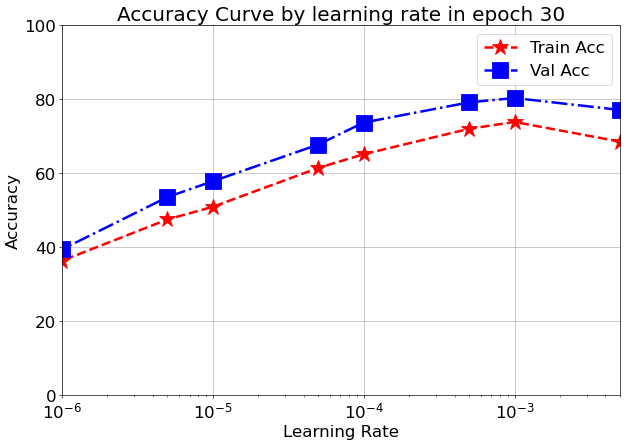

In [44]:
Train_max_acc = np.max(Train_acc,axis = 0)
Val_max_acc = np.max(Val_acc,axis = 0)
print(Train_max_acc)
print(Val_max_acc)
plt.figure()
plt.plot(List_LR, Train_max_acc,'r*--',markersize=20,linewidth=3, label = "Train Acc")
plt.plot(List_LR, Val_max_acc,'bs-.',markersize=20,linewidth=3, label = "Val Acc")
plt.xlim(1e-6,5e-3)
plt.ylim(0,100)
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.semilogx(base=10)
plt.title("Accuracy Curve by learning rate in epoch 30")
plt.legend()
plt.grid()
plt.show()

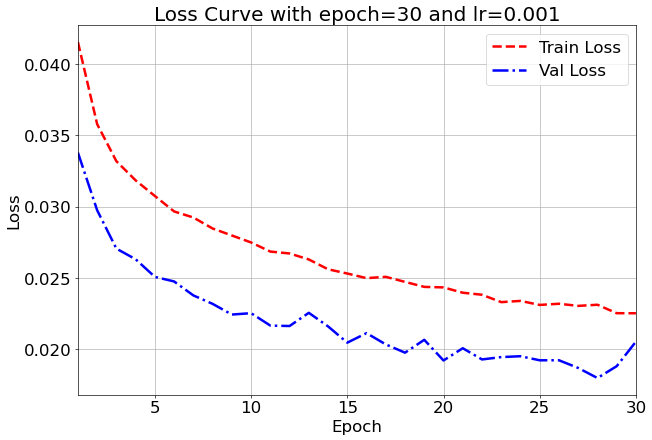

In [45]:
# List_LR 중 0.001 값일 때의 정확성이 가장 높았으므로 이때의 Loss 값을 확인한다.
Train_max_loss = Train_loss[:,1]
Val_max_loss = Val_loss[:,1]
x = np.linspace(1,30,30)
plt.figure()
plt.plot(x,Train_max_loss,'r--',linewidth=3,label="Train Loss")
plt.plot(x,Val_max_loss,'b-.',linewidth=3,label="Val Loss")
plt.xlim(1,30)
plt.title("Loss Curve with epoch=30 and lr=0.001")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

#### <b>(알아보기) 혼동 행렬 시각화하기</b>

* 참고: [Seaborn.heatmap 공식 문서](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 
* 각 클래스에 대하여 정확히 분류하는지 확인하기 위해 <b>혼동 행렬(confusion matrix)</b>을 생성할 수 있습니다.

In [46]:
# 네트워크에 데이터셋을 입력하여 혼동 행렬(confusion matrix)을 계산하는 함수
def get_confusion_matrix(net, num_classes, data_loader):
    net.eval() # 모델을 평가 모드로 설정
    confusion_matrix = torch.zeros(num_classes, num_classes, dtype=torch.int32)

    for batch_idx, (inputs, targets) in enumerate(data_loader):
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = net(inputs)
        _, predicted = outputs.max(1)

        for t, p in zip(targets.view(-1), predicted.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

    return confusion_matrix

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


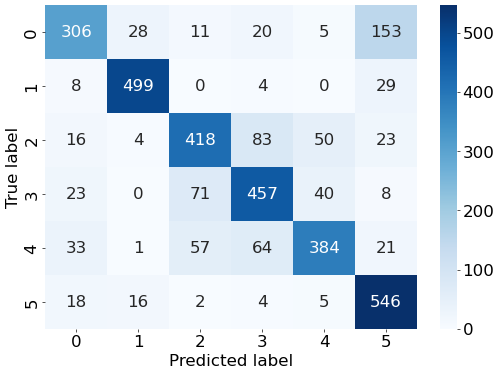

[ 각 클래스에 따른 정확도 ]
tensor([0.5851, 0.9241, 0.7037, 0.7629, 0.6857, 0.9239])
[ 전체 평균 정확도 ]
tensor(0.7661)


In [47]:
import pandas as pd
import seaborn as sns

net = LeNet()
net = net.to(device)

file_name = "LeNet_0_001.pt"
file = os.path.join(path_checkpoint,file_name)
checkpoint = torch.load(file)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>Problem 3. CustomLeNet 아키텍처 작성하기</b>

* 다음과 같이 LeNet 아키텍처를 변경하여 CustomLeNet을 만들어 봅시다.
    * 커널 크기와 커널의 개수를 증가시켰습니다. (파라미터 수 증가)
    * Fully Connected 레이어의 차원을 증가시켰습니다. (파라미터 수 증가)

Layer | Type | Specification
:-: | :-: | ---
1 | Input | image size: 3 X 64 X 64
2 | Convolution | # of kernel: 128, kernel size: 8 X 8, stride: 1, zero padding: 0
3 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
4 | Convolution | # of kernel: 256, kernel size: 8 X 8, stride: 1, zero padding: 0
5 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
6 | Convolution | # of kernel: 512, kernel size: 4 X 4, stride: 1, zero padding: 0
7 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
8 | Fully Connected | # of neuron: 4096
9 | Activation | ReLU
10 | Fully Connected | # of neuron: 6
11 | Softmax | 6 classes


In [51]:
class CustomLeNet(nn.Module):
    def __init__(self):
        super(CustomLeNet, self).__init__()
        # 이 부분에 소스코드를 작성하세요.
        # → 차원(dimension): (3 x 64 x 64)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=128, kernel_size=8, stride=1, padding=0)
        # → 차원(dimension): (128 x 57 x 57)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # → 차원(dimension): (128 x 28 x 28)
        self.conv2 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=8, stride=1, padding=0)
        # → 차원(dimension): (256 x 21 x 21)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # → 차원(dimension): (256 x 10 x 10)
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=4, stride=1, padding=0)
        # → 차원(dimension): (512 x 7 x 7)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        # → 차원(dimension): (512 x 3 x 3)
        self.fc1 = nn.Linear(512 * 3 * 3, 4096)
        # → 차원(dimension): (4096)
        self.fc2 = nn.Linear(4096, 6)
        # → 차원(dimension): (6)
        
    def forward(self, x):
        # 이 부분에 소스코드를 작성하세요.
        x = self.pool1(self.conv1(x))
        x = self.pool2(self.conv2(x))
        x = self.pool3(self.conv3(x))
        x = torch.flatten(x, 1) # 배치(batch)를 제외한 모든 차원 flatten하기
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#### <b>(알아보기) CustomLeNet 평가하기</b>

* 새롭게 작성한 CustomLeNet과 앞선 LeNet의 성능을 비교합니다.
    * 파라미터가 증가한 만큼 성능 향상이 있는지 확인해 봅시다.
* 아래 코드를 실행하여 학습 및 성능 평가를 진행할 수 있습니다.

In [52]:
import time
import torch.optim as optim

epoch = 30
Train_acc = np.zeros((epoch,len(List_LR)))
Train_loss = np.zeros((epoch,len(List_LR)))
Val_acc = np.zeros((epoch,len(List_LR)))
Val_loss = np.zeros((epoch,len(List_LR)))

for l,learning_rate in enumerate(List_LR):
    lr_name = List_LR_name[l]
    file_name = "CustomLeNet_"+lr_name+".pt"

    net = CustomLeNet()
    net = net.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)
    start_time = time.time() # 시작 시간

    for i in range(epoch):
        train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
        val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

        # 학습된 모델 저장하기
        state = {
            'net': net.state_dict()
        }
        
        path_checkpoint = os.path.join(path,'checkpoint')
        if not os.path.isdir(path_checkpoint):
            os.mkdir(path_checkpoint)
            
        torch.save(state, os.path.join(path_checkpoint, file_name))
        print(f'Model saved! (time elapsed: {time.time() - start_time})')
        # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
        Train_acc[i,l]=train_acc
        Train_loss[i,l]=train_loss
        Val_acc[i,l]=val_acc
        Val_loss[i,l]=val_loss

[ Train epoch: 0 ]
Train accuarcy: 48.425919131136716
Train average loss: 0.04067597296842084
[ Validation epoch: 1 ]
Accuarcy: 60.78661579101849
Average loss: 0.03120502938893942
Model saved! (time elapsed: 10.042221784591675)
[ Train epoch: 1 ]
Train accuarcy: 54.42136934028033
Train average loss: 0.036387300551694354
[ Validation epoch: 2 ]
Accuarcy: 65.9230995010273
Average loss: 0.028963645637507727
Model saved! (time elapsed: 19.935039043426514)
[ Train epoch: 2 ]
Train accuarcy: 57.80435899317531
Train average loss: 0.03431062010507324
[ Validation epoch: 3 ]
Accuarcy: 66.86234223657176
Average loss: 0.027895716696076635
Model saved! (time elapsed: 29.886354207992554)
[ Train epoch: 3 ]
Train accuarcy: 58.34006017465326
Train average loss: 0.03411403554913722
[ Validation epoch: 4 ]
Accuarcy: 69.06369239800411
Average loss: 0.02672109623650914
Model saved! (time elapsed: 39.78714847564697)
[ Train epoch: 4 ]
Train accuarcy: 57.95846481250459
Train average loss: 0.034313403708031

Train accuarcy: 63.19806266969986
Train average loss: 0.030218061224558893
[ Validation epoch: 7 ]
Accuarcy: 71.20633988846492
Average loss: 0.024869707836445595
Model saved! (time elapsed: 69.10043358802795)
[ Train epoch: 7 ]
Train accuarcy: 64.15938944742057
Train average loss: 0.029631048911139386
[ Validation epoch: 8 ]
Accuarcy: 72.14558262400939
Average loss: 0.023763665372337945
Model saved! (time elapsed: 78.98996472358704)
[ Train epoch: 8 ]
Train accuarcy: 64.92991854406692
Train average loss: 0.029293614146539207
[ Validation epoch: 9 ]
Accuarcy: 71.49985324332258
Average loss: 0.024685407283196254
Model saved! (time elapsed: 88.8059983253479)
[ Train epoch: 9 ]
Train accuarcy: 64.98862552285902
Train average loss: 0.029199760767791908
[ Validation epoch: 10 ]
Accuarcy: 73.84796008218373
Average loss: 0.023384868285157026
Model saved! (time elapsed: 98.71042251586914)
[ Train epoch: 10 ]
Train accuarcy: 65.06200924634916
Train average loss: 0.02845168024259976
[ Validation 

Train accuarcy: 64.79048946943568
Train average loss: 0.029145624069507242
[ Validation epoch: 13 ]
Accuarcy: 71.82271793366598
Average loss: 0.024181625711487506
Model saved! (time elapsed: 128.23702883720398)
[ Train epoch: 13 ]
Train accuarcy: 65.27482204447054
Train average loss: 0.02892086042594672
[ Validation epoch: 14 ]
Accuarcy: 71.85206926915174
Average loss: 0.024282581126686412
Model saved! (time elapsed: 138.1566731929779)
[ Train epoch: 14 ]
Train accuarcy: 65.17942320393337
Train average loss: 0.028701254464983898
[ Validation epoch: 15 ]
Accuarcy: 73.67185206926915
Average loss: 0.023450808184637434
Model saved! (time elapsed: 147.9904007911682)
[ Train epoch: 15 ]
Train accuarcy: 66.28751742863433
Train average loss: 0.028103100839728102
[ Validation epoch: 16 ]
Accuarcy: 74.31758144995597
Average loss: 0.022875695178541648
Model saved! (time elapsed: 157.93198204040527)
[ Train epoch: 16 ]
Train accuarcy: 66.9479709400455
Train average loss: 0.027493123364499286
[ Val

Train accuarcy: 59.90313348499303
Train average loss: 0.032976494585504584
[ Validation epoch: 19 ]
Accuarcy: 66.39272086879953
Average loss: 0.028423355617304857
Model saved! (time elapsed: 187.84898376464844)
[ Train epoch: 19 ]
Train accuarcy: 60.13062302781243
Train average loss: 0.03243412754195727
[ Validation epoch: 20 ]
Accuarcy: 65.71764015262694
Average loss: 0.02890308128272399
Model saved! (time elapsed: 197.70102667808533)
[ Train epoch: 20 ]
Train accuarcy: 60.438834666470974
Train average loss: 0.03229586052126516
[ Validation epoch: 21 ]
Accuarcy: 66.51012621074258
Average loss: 0.0275299282132757
Model saved! (time elapsed: 207.54795050621033)
[ Train epoch: 21 ]
Train accuarcy: 60.98921259264695
Train average loss: 0.03205632394063654
[ Validation epoch: 22 ]
Accuarcy: 67.39066627531552
Average loss: 0.027357560625375803
Model saved! (time elapsed: 217.40902376174927)
[ Train epoch: 22 ]
Train accuarcy: 61.23137888016438
Train average loss: 0.03167111068633767
[ Valid

Train accuarcy: 58.149262493578924
Train average loss: 0.03412066489171586
[ Validation epoch: 25 ]
Accuarcy: 65.21866744936895
Average loss: 0.029566288186827116
Model saved! (time elapsed: 246.60559916496277)
[ Train epoch: 25 ]
Train accuarcy: 57.929111323108536
Train average loss: 0.03396095884093852
[ Validation epoch: 26 ]
Accuarcy: 64.80774875256824
Average loss: 0.0298444654957654
Model saved! (time elapsed: 256.45720863342285)
[ Train epoch: 26 ]
Train accuarcy: 58.93446833492332
Train average loss: 0.03349900986186528
[ Validation epoch: 27 ]
Accuarcy: 64.04461402993836
Average loss: 0.029763721233594092
Model saved! (time elapsed: 266.2682867050171)
[ Train epoch: 27 ]
Train accuarcy: 58.70697879210391
Train average loss: 0.03360119036203296
[ Validation epoch: 28 ]
Accuarcy: 64.95450542999707
Average loss: 0.029753358387898096
Model saved! (time elapsed: 276.1518361568451)
[ Train epoch: 28 ]
Train accuarcy: 59.00051368606443
Train average loss: 0.0335620484943828
[ Validat

Train accuarcy: 26.19065091362736
Train average loss: 0.05537623377427882
[ Validation epoch: 1 ]
Accuarcy: 33.460522453771645
Average loss: 0.054887986022214716
Model saved! (time elapsed: 9.893922090530396)
[ Train epoch: 1 ]
Train accuarcy: 33.70514419901666
Train average loss: 0.054329772675090746
[ Validation epoch: 2 ]
Accuarcy: 37.980628118579396
Average loss: 0.05370374827361156
Model saved! (time elapsed: 19.80159044265747)
[ Train epoch: 2 ]
Train accuarcy: 34.64445585969032
Train average loss: 0.05333064018328454
[ Validation epoch: 3 ]
Accuarcy: 39.947167596125624
Average loss: 0.052532242930876674
Model saved! (time elapsed: 29.684982776641846)
[ Train epoch: 3 ]
Train accuarcy: 35.31958611579952
Train average loss: 0.052348825169946316
[ Validation epoch: 4 ]
Accuarcy: 40.24068095098327
Average loss: 0.05138262769572015
Model saved! (time elapsed: 39.552568435668945)
[ Train epoch: 4 ]
Train accuarcy: 34.77654656197255
Train average loss: 0.05155661825721871
[ Validation 

Train accuarcy: 30.20474058853746
Train average loss: 0.05480792887747799
[ Validation epoch: 7 ]
Accuarcy: 32.63868506017024
Average loss: 0.05478132145475494
Model saved! (time elapsed: 69.04917073249817)
[ Train epoch: 7 ]
Train accuarcy: 30.718426652968372
Train average loss: 0.054632698937593344
[ Validation epoch: 8 ]
Accuarcy: 34.517170531259175
Average loss: 0.05454989539096878
Model saved! (time elapsed: 78.89790916442871)
[ Train epoch: 8 ]
Train accuarcy: 31.91458134585749
Train average loss: 0.05440337849335178
[ Validation epoch: 9 ]
Accuarcy: 35.955385970061634
Average loss: 0.05431056718935461
Model saved! (time elapsed: 88.74985837936401)
[ Train epoch: 9 ]
Train accuarcy: 32.43560578263741
Train average loss: 0.05420811917082513
[ Validation epoch: 10 ]
Accuarcy: 37.12943938949222
Average loss: 0.054078313238571075
Model saved! (time elapsed: 98.55119824409485)
[ Train epoch: 10 ]
Train accuarcy: 33.257503485726865
Train average loss: 0.05401810080550024
[ Validation e

[65.72980113 71.43171645 69.42100242 62.36148822 59.00051369 49.6807808
 45.45387833 35.94334777]
[73.40769005 77.54622835 76.90049897 70.35515116 65.74699149 54.88699736
 50.27883769 41.97240974]


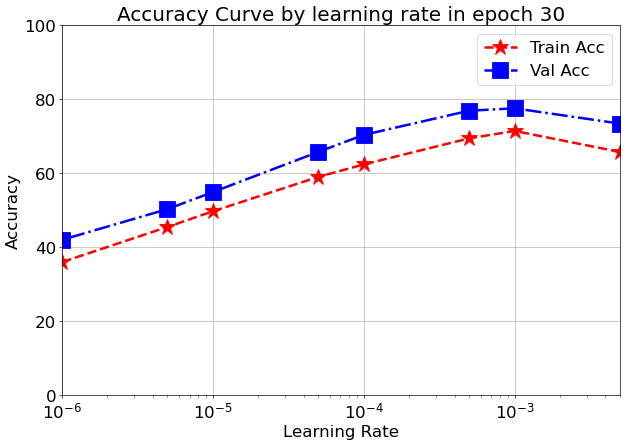

In [53]:
Train_max_acc = np.max(Train_acc,axis = 0)
Val_max_acc = np.max(Val_acc,axis = 0)
print(Train_max_acc)
print(Val_max_acc)
plt.figure()
plt.plot(List_LR, Train_max_acc,'r*--',markersize=20,linewidth=3, label = "Train Acc")
plt.plot(List_LR, Val_max_acc,'bs-.',markersize=20,linewidth=3, label = "Val Acc")
plt.xlim(1e-6,5e-3)
plt.ylim(0,100)
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.semilogx(base=10)
plt.title("Accuracy Curve by learning rate in epoch 30")
plt.legend()
plt.grid()
plt.show()

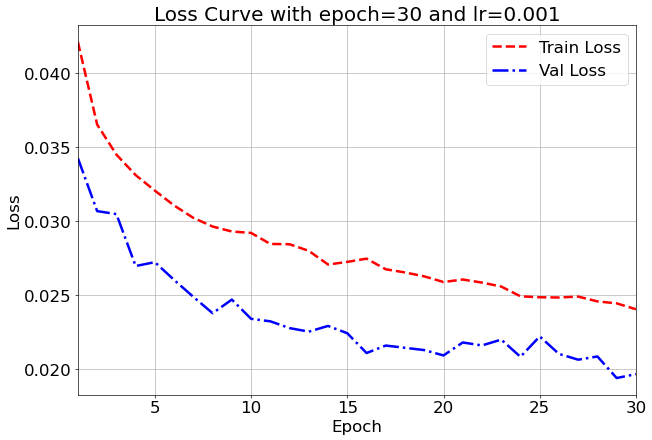

In [54]:
# List_LR 중 0.001 값일 때의 정확성이 가장 높았으므로 이때의 Loss 값을 확인한다.
Train_max_loss = Train_loss[:,1]
Val_max_loss = Val_loss[:,1]
x = np.linspace(1,30,30)
plt.figure()
plt.plot(x,Train_max_loss,'r--',linewidth=3,label="Train Loss")
plt.plot(x,Val_max_loss,'b-.',linewidth=3,label="Val Loss")
plt.xlim(1,30)
plt.title("Loss Curve with epoch=30 and lr=0.001")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


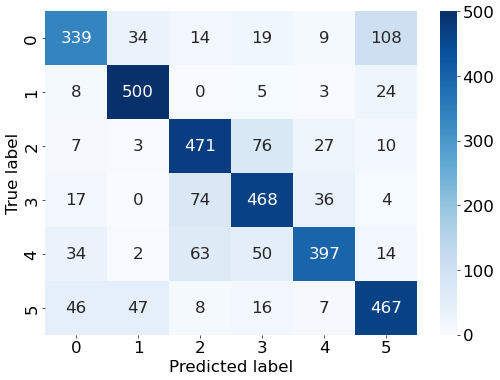

[ 각 클래스에 따른 정확도 ]
tensor([0.6482, 0.9259, 0.7929, 0.7813, 0.7089, 0.7902])
[ 전체 평균 정확도 ]
tensor(0.7755)


In [55]:
import pandas as pd
import seaborn as sns

net = CustomLeNet()
net = net.to(device)

file_name = "./checkpoint/CustomLeNet_0_001.pt"
checkpoint = torch.load(file_name)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>Problem 4. AlexNet 아키텍처 작성하기</b>

* AlexNet은 CNN 기반의 분류 모델의 우수성을 전 세계에 알린 논문([NIPS 2012](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf))입니다.
    * ImageNet 분류 대회(ILSVRC 2012)에서 압도적인 성능으로 우승(1위)을 차지했습니다.

<hr>

* LRN (Local Response Normalization)을 활용합니다.
    * PyTorch에서 [nn.LocalResponseNorm()](https://pytorch.org/docs/stable/generated/torch.nn.LocalResponseNorm.html)을 이용해 구현할 수 있습니다.
    * Local Response Normalization은 입력과 출력의 차원이 동일한 레이어입니다.
* Dropout을 활용합니다.
    * PyTorch에서 [nn.Dropout()](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)을 이용해 구현할 수 있습니다.
* ReLU를 적극적으로 활용합니다.
    * PyTorch에서 [nn.ReLU()](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)를 이용해 구현할 수 있습니다.

<hr>

* <b>아래의 표</b>와 같은 아키텍처를 PyTorch로 구현해 봅시다.
    * 원본 논문에서 제안한 것과 완전히 동일한 아키텍처는 아니지만, 핵심 아이디어를 잘 포함하고 있습니다.

Layer | Type | Specification
:-: | :-: | ---
1 | Input | image size: 3 X 64 X 64
2 | Convolution | # of kernel: 96, kernel size: 5 X 5, stride: 1, zero padding: 2
3 | Activation | ReLU
4 | Normalization | LRN (Local Response Normalization), size: 5
5 | Pooling | max pooling, kernel size: 3 X 3, stride: 2
6 | Convolution | # of kernel: 256, kernel size: 5 X 5, stride: 1, zero padding: 2
7 | Activation | ReLU
8 | Normalization | LRN (Local Response Normalization), size: 5
9 | Pooling | max pooling, kernel size: 3 X 3, stride: 2
10 | Convolution | # of kernel: 384, kernel size: 3 X 3, stride: 1, zero padding: 1
11 | Activation | ReLU
12 | Convolution | # of kernel: 384, kernel size: 3 X 3, stride: 1, zero padding: 1
13 | Activation | ReLU
14 | Convolution | # of kernel: 256, kernel size: 3 X 3, stride: 1, zero padding: 1
15 | Activation | ReLU
16 | Pooling | max pooling, kernel size: 3 X 3, stride: 2
17 | Fully Connected | # of neuron: 4096
18 | Activation | ReLU
19 | Dropout | Probability: 0.5
20 | Neural Network| # of neuron: 4096
21 | Dropout | Probability: 0.5
22 | Softmax | 6 classes

* 표와 동일하게 정상적으로 구현했다면, <b>83~85%가량의 정확도</b>를 얻을 수 있습니다.

In [95]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        # → 차원(dimension): (3 x 64 x 64)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=96, kernel_size=5, stride=1, padding=2, padding_mode='zeros')
        # → 차원(dimension): (96 x 64 x 64)
        self.LRN1 = nn.LocalResponseNorm(size=5)
        # → 차원(dimension): (96 x 64 x 64)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        # → 차원(dimension): (96 x 31 x 31)
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2, padding_mode='zeros')
        # → 차원(dimension): (256 x 31 x 31)
        self.LRN2 = nn.LocalResponseNorm(size=5)
        # → 차원(dimension): (256 x 31 x 31)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        # → 차원(dimension): (256 x 15 x 15)
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1, padding_mode='zeros')
        # → 차원(dimension): (384 x 15 x 15)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1, padding_mode='zeros')
        # → 차원(dimension): (384 x 15 x 15)
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1, padding_mode='zeros')
        # → 차원(dimension): (256 x 15 x 15)
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)
        # → 차원(dimension): (256 x 7 x 7)
        self.fc1 = nn.Linear(256 * 7 * 7, 4096)
        # → 차원(dimension): (4096)
        self.Drop1 = nn.Dropout(p=0.5)
        # → 차원(dimension): (4096)
        self.fc2 = nn.Linear(4096, 4096)
        # → 차원(dimension): (4096)
        self.Drop2 = nn.Dropout(p=0.5)
        # → 차원(dimension): (4096)
        self.fc3 = nn.Linear(4096, 6)
        # → 차원(dimension): (6)

    def forward(self, x):
        # 이 부분에 소스코드를 작성하세요.
        x = self.pool1(self.LRN1(F.relu(self.conv1(x),inplace=True)))
        x = self.pool2(self.LRN2(F.relu(self.conv2(x),inplace=True)))
        x = F.relu(self.conv3(x),inplace=True)
        x = F.relu(self.conv4(x),inplace=True)
        x = self.pool3(F.relu(self.conv5(x),inplace=True))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x),inplace=True)
        x = self.Drop1(x)
        x = self.fc2(x)
        x = self.Drop2(x)
        x = self.fc3(x)
        return x


#### <b>(알아보기) AlexNet 평가하기</b>

* 아래 코드를 실행하여 학습 및 성능 평가를 진행할 수 있습니다.
* 83~85%가량의 정확도가 나오지 않는다면, 표와 동일하게 AlexNet 코드를 다시 작성했는지 확인해 주세요.

In [96]:
import time
import torch.optim as optim
seed=1101
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
net = AlexNet()
net = net.to(device)

epoch = 30
learning_rate = 0.002
file_name = "AlexNet.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

[ Train epoch: 0 ]
Train accuarcy: 37.9100315550011
Train average loss: 0.04717706957750103
[ Validation epoch: 1 ]
Accuarcy: 56.50132081009686
Average loss: 0.032955441371345574
Model saved! (time elapsed: 18.576984405517578)
[ Train epoch: 1 ]
Train accuarcy: 50.957657591546194
Train average loss: 0.03696326298103772
[ Validation epoch: 2 ]
Accuarcy: 60.17023774581744
Average loss: 0.0318319064660404
Model saved! (time elapsed: 37.067413091659546)
[ Train epoch: 2 ]
Train accuarcy: 55.77162985249871
Train average loss: 0.03405034885006185
[ Validation epoch: 3 ]
Accuarcy: 65.86439683005577
Average loss: 0.02808937571214587
Model saved! (time elapsed: 55.38028359413147)
[ Train epoch: 3 ]
Train accuarcy: 60.35077419828282
Train average loss: 0.03150926098974363
[ Validation epoch: 4 ]
Accuarcy: 72.11623128852362
Average loss: 0.024404897844123113
Model saved! (time elapsed: 73.7715995311737)
[ Train epoch: 4 ]
Train accuarcy: 64.43090922433404
Train average loss: 0.029106294775495544


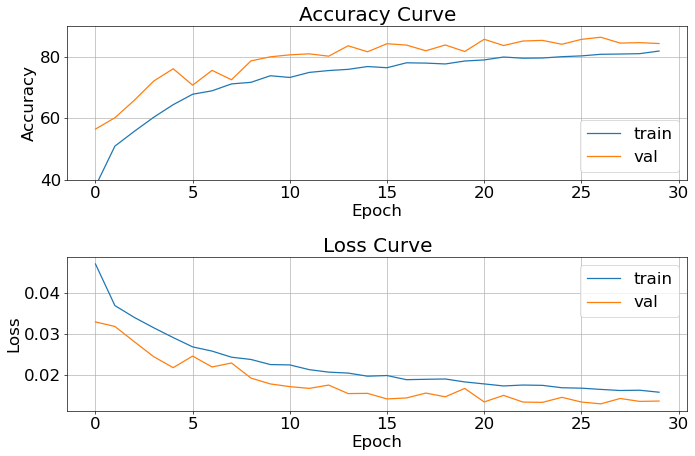

In [103]:
# 정확도(accuracy) 커브 시각화
plt.subplot(211)
plt.plot([i for i in range(epoch)], [i[0] for i in train_result])
plt.plot([i for i in range(epoch)], [i[0] for i in val_result])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(40,90)
plt.grid()

plt.legend(["train", "val"])

# 손실(loss) 커브 시각화
plt.subplot(212)
plt.plot([i for i in range(epoch)], [i[1] for i in train_result])
plt.plot([i for i in range(epoch)], [i[1] for i in val_result])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val"])

plt.tight_layout()
plt.grid()
plt.show()

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


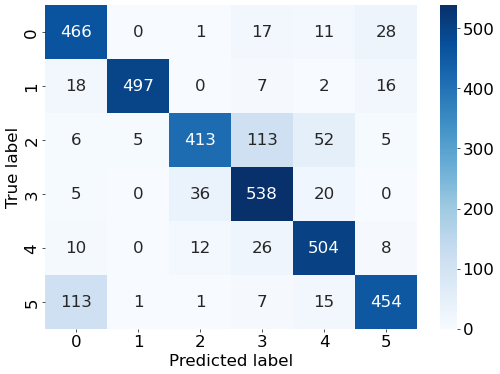

[ 각 클래스에 따른 정확도 ]
tensor([0.8910, 0.9204, 0.6953, 0.8982, 0.9000, 0.7682])
[ 전체 평균 정확도 ]
tensor(0.8430)


In [104]:
import pandas as pd
import seaborn as sns


net = AlexNet()
net = net.to(device)

file_name = "./checkpoint/AlexNet.pt"
checkpoint = torch.load(file_name)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>(알아보기) LightResNet 아키텍처 살펴보기</b>

* [ResNet (2016 CVPR)](https://arxiv.org/abs/1512.03385) 논문에서 제안된 가벼운 ResNet을 PyTorch로 구현한 것은 다음과 같습니다.
    * 원본 논문에서는 CIFAR-10을 위하여 해당 아키텍처를 제안했습니다.
* 레이어의 깊이에 따라 다양한 버전이 있습니다.
    * 다양한 버전: 20 레이어, 32 레이어, 44 레이어, 56 레이어, 110 레이어
    * 일반적으로 더 깊은 레이어로 구성된 ResNet이 더 높은 정확도를 보입니다.

In [105]:
# ResNet을 위한 BasicBlock 클래스 정의
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()

        # 3x3 필터를 사용 (stride 값이 2라면, 너비와 높이가 절반으로 감소)
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes) # 배치 정규화(batch normalization)

        # 3x3 필터를 사용 (stride 값이 1이므로, 너비와 높이가 유지)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes) # 배치 정규화(batch normalization)

        self.shortcut = nn.Sequential() # identity인 경우
        if stride != 1: # stride가 1이 아니라면, identity mapping이 아닌 경우
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes, kernel_size=1, stride=stride, padding=0, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x) # (핵심) skip connection
        out = F.relu(out)
        return out


# LightResNet 클래스 정의
class LightResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=6):
        super(LightResNet, self).__init__()
        self.in_planes = 16

        # 16개의 3x3 필터(filter)를 사용
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        # 첫 레이어를 제외하고는 너비와 높이를 줄이기 위해 stride를 2로 설정
        self.layer1 = self._make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=2)
        self.linear = nn.Linear(64, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1) # 첫째 블록만 너비와 높이 감소
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes # 다음 레이어를 위해 채널 수 변경
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, out.size()[3])
        out = out.view(out.size(0), -1) # 배치(batch)를 제외한 모든 차원 flatten하기
        out = self.linear(out)
        return out


def LightResNet20():
    return LightResNet(BasicBlock, [3, 3, 3])


def LightResNet32():
    return LightResNet(BasicBlock, [5, 5, 5])


def LightResNet44():
    return LightResNet(BasicBlock, [7, 7, 7])


def LightResNet56():
    return LightResNet(BasicBlock, [9, 9, 9])


def LightResNet110():
    return LightResNet(BasicBlock, [18, 18, 18])

#### <b>(알아보기) LightResNet-20 학습하기</b>

* PyTorch로 구현된 LightResNet-20 모델을 학습해 봅시다.

In [106]:
import time
import torch.optim as optim


net = LightResNet20()
net = net.to(device)

epoch = 30
learning_rate = 0.002
file_name = "LightResNet20.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

[ Train epoch: 0 ]
Train accuarcy: 52.52806927423497
Train average loss: 0.036428829662569065
[ Validation epoch: 1 ]
Accuarcy: 66.06985617845612
Average loss: 0.027920440001189623
Model saved! (time elapsed: 10.447265625)
[ Train epoch: 1 ]
Train accuarcy: 62.68437660526895
Train average loss: 0.029926898662820202
[ Validation epoch: 2 ]
Accuarcy: 63.98591135896683
Average loss: 0.029616211861643163
Model saved! (time elapsed: 20.598524570465088)
[ Train epoch: 2 ]
Train accuarcy: 67.5717325897116
Train average loss: 0.026679547753592638
[ Validation epoch: 3 ]
Accuarcy: 61.40299383621955
Average loss: 0.03393243032359713
Model saved! (time elapsed: 30.596093893051147)
[ Train epoch: 3 ]
Train accuarcy: 69.80259778381155
Train average loss: 0.02497187458236245
[ Validation epoch: 4 ]
Accuarcy: 79.57147050190784
Average loss: 0.01870024336339583
Model saved! (time elapsed: 40.74411368370056)
[ Train epoch: 4 ]
Train accuarcy: 72.25361414838189
Train average loss: 0.023331093538390957
[

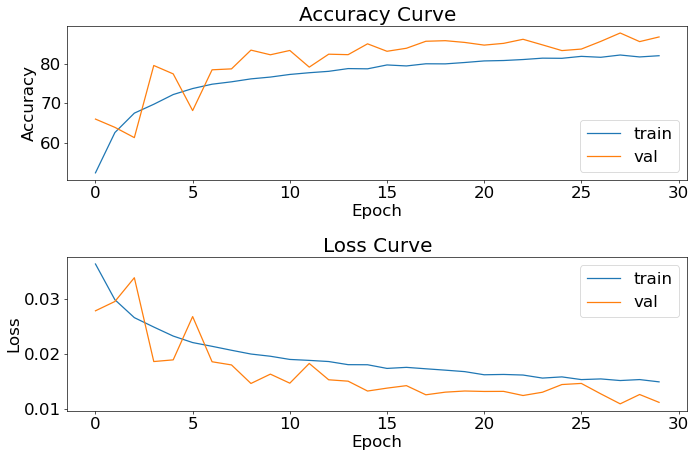

In [107]:
# 정확도(accuracy) 커브 시각화
plt.subplot(211)
plt.plot([i for i in range(epoch)], [i[0] for i in train_result])
plt.plot([i for i in range(epoch)], [i[0] for i in val_result])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])

# 손실(loss) 커브 시각화
plt.subplot(212)
plt.plot([i for i in range(epoch)], [i[1] for i in train_result])
plt.plot([i for i in range(epoch)], [i[1] for i in val_result])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val"])

plt.tight_layout()
plt.show()

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000021405429EE0>
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\envs\SU\lib\site-packages\torch\utils\data\dataloader.py", line 1510, in __del__
  File "C:\Users\USER\anaconda3\envs\SU\lib\site-packages\torch\utils\data\dataloader.py", line 1468, in _shutdown_workers
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


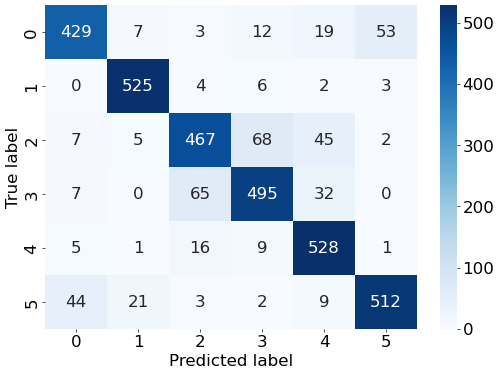

[ 각 클래스에 따른 정확도 ]
tensor([0.8203, 0.9722, 0.7862, 0.8264, 0.9429, 0.8663])
[ 전체 평균 정확도 ]
tensor(0.8676)


In [108]:
import pandas as pd
import seaborn as sns


net = LightResNet20()
net = net.to(device)

file_name = "./checkpoint/LightResNet20.pt"
checkpoint = torch.load(file_name)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>Problem 5. 다양한 레이어 깊이에 따라 LightResNet 학습하기</b>

* Residual Block을 사용하는 경우 깊이가 깊어져도 좋은 성능을 내는 경향이 있습니다.
* 다음의 LightResNet 모델들에 대하여 각각 학습을 진행한 뒤에, 검증 정확도(validation accuracy)를 쓰세요.
    * LightResNet32: {0.8559}
    * LightResNet56: {0.8571}
    * LightResNet110: {0.8242}
* 레이어가 깊어짐에 따라서 성능이 좋아지나요? {아니요.}
    * 그 이유는: {overfitting 발생}

****************************** LightResNet32.pt ******************************
[ Train epoch: 0 ]
Train accuarcy: 50.040361047919575
Train average loss: 0.03785253003258221
[ Validation epoch: 1 ]
Accuarcy: 64.77839741708247
Average loss: 0.02851871424908158
[ Train epoch: 1 ]
Train accuarcy: 62.88985103104132
Train average loss: 0.02968457638845586
[ Validation epoch: 2 ]
Accuarcy: 58.61461696507191
Average loss: 0.03323977044995383
[ Train epoch: 2 ]
Train accuarcy: 68.19549423937771
Train average loss: 0.026414818664267904
[ Validation epoch: 3 ]
Accuarcy: 78.89638978573525
Average loss: 0.020246815490764642
[ Train epoch: 3 ]
Train accuarcy: 70.59514199750495
Train average loss: 0.024174389636130784
[ Validation epoch: 4 ]
Accuarcy: 80.48136190196654
Average loss: 0.017820270522654773
[ Train epoch: 4 ]
Train accuarcy: 72.81133044690688
Train average loss: 0.023033391358156567
[ Validation epoch: 5 ]
Accuarcy: 80.98033460522454
Average loss: 0.017168019868986747
[ Train epoch: 5 ]


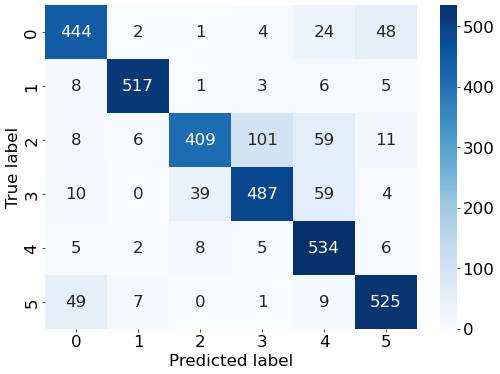

[ 각 클래스에 따른 정확도 ]
tensor([0.8489, 0.9574, 0.6886, 0.8130, 0.9536, 0.8883])
[ 전체 평균 정확도 ]
tensor(0.8559)
****************************** LightResNet56.pt ******************************
[ Train epoch: 0 ]
Train accuarcy: 49.37256916415939
Train average loss: 0.038025680423404006
[ Validation epoch: 1 ]
Accuarcy: 57.26445553272674
Average loss: 0.03178645368192005
[ Train epoch: 1 ]
Train accuarcy: 61.90650913627358
Train average loss: 0.03075985497526249
[ Validation epoch: 2 ]
Accuarcy: 66.65688288817141
Average loss: 0.029019584491660876
[ Train epoch: 2 ]
Train accuarcy: 67.04336978058267
Train average loss: 0.02712411272112006
[ Validation epoch: 3 ]
Accuarcy: 73.90666275315527
Average loss: 0.021680843053341333
[ Train epoch: 3 ]
Train accuarcy: 69.8833198796507
Train average loss: 0.025227851934423187
[ Validation epoch: 4 ]
Accuarcy: 73.67185206926915
Average loss: 0.022527309283854713
[ Train epoch: 4 ]
Train accuarcy: 71.20422690247302
Train average loss: 0.024098183070431455
[ V

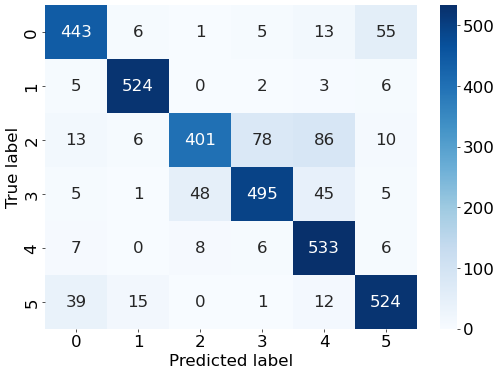

[ 각 클래스에 따른 정확도 ]
tensor([0.8470, 0.9704, 0.6751, 0.8264, 0.9518, 0.8866])
[ 전체 평균 정확도 ]
tensor(0.8571)
****************************** LightResNet110.pt ******************************
[ Train epoch: 0 ]
Train accuarcy: 43.97886548763484
Train average loss: 0.04200301486065219
[ Validation epoch: 1 ]
Accuarcy: 58.7026709715292
Average loss: 0.03237330281982892
[ Train epoch: 1 ]
Train accuarcy: 56.189917076392454
Train average loss: 0.03410474782715437
[ Validation epoch: 2 ]
Accuarcy: 63.22277663633695
Average loss: 0.02907582423817842
[ Train epoch: 2 ]
Train accuarcy: 61.06259631613708
Train average loss: 0.0311443804032456
[ Validation epoch: 3 ]
Accuarcy: 69.35720575286176
Average loss: 0.025956604744564377
[ Train epoch: 3 ]
Train accuarcy: 65.07668599104719
Train average loss: 0.028298850928450258
[ Validation epoch: 4 ]
Accuarcy: 71.41179923686528
Average loss: 0.023691310494534597
[ Train epoch: 4 ]
Train accuarcy: 67.93131283481324
Train average loss: 0.026679189371207127
[ Va

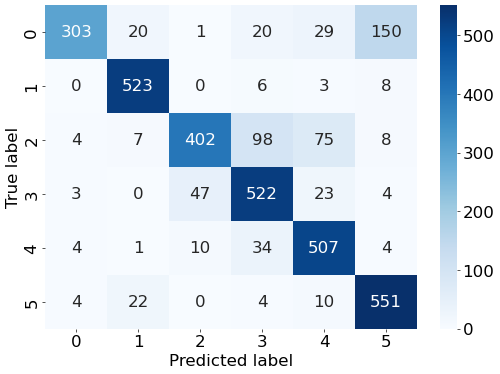

[ 각 클래스에 따른 정확도 ]
tensor([0.5793, 0.9685, 0.6768, 0.8715, 0.9054, 0.9323])
[ 전체 평균 정확도 ]
tensor(0.8242)


In [109]:
import time
import torch.optim as optim
model_list = [32,56,110]
for models in model_list:
    net = globals()[f"LightResNet{models}"]()
    net = net.to(device)

    epoch = 30
    learning_rate = 0.002
    file_name = "LightResNet"+str(models)+".pt"

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

    train_result = []
    val_result = []

    start_time = time.time() # 시작 시간
    print("*"*30,"LightResNet"+str(models)+".pt","*"*30)
    for i in range(epoch):
        train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
        val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

        # 학습된 모델 저장하기
        state = {
            'net': net.state_dict()
        }
        if not os.path.isdir('checkpoint'):
            os.mkdir('checkpoint')
        torch.save(state, './checkpoint/' + file_name)
#         print(f'Model saved! (time elapsed: {time.time() - start_time})')

        # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
        train_result.append((train_acc, train_loss))
        val_result.append((val_acc, val_loss))
        
    checkpoint = torch.load('./checkpoint/' + file_name)
    net.load_state_dict(checkpoint['net'])

    # 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
    confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
    print("[ 각 클래스당 데이터 개수 ]")
    print(confusion_matrix.sum(1))

    print("[ 혼동 행렬(confusion matrix) 시각화 ]")
    res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
    res.index.name = 'True label'
    res.columns.name = 'Predicted label'
    plt.figure(figsize = (10, 7))
    sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
    plt.show()

    print("[ 각 클래스에 따른 정확도 ]")
    # (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
    print(confusion_matrix.diag() / confusion_matrix.sum(1))

    print("[ 전체 평균 정확도 ]")
    print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>(알아보기) ResNet 아키텍처 살펴보기</b>

* [ResNet (2016 CVPR)](https://arxiv.org/abs/1512.03385) 논문에서 제안된 기본적인 ResNet의 핵심 아이디어를 PyTorch로 구현한 것은 다음과 같습니다.
    * LightResNet에 비하여 <b>커널의 개수(number of kernels)가 많은</b> 것을 확인할 수 있습니다.
    * 따라서 ImageNet과 같은 큰 규모의 데이터셋에 대해서 사용하기에 적합합니다.
* (참고) [PyTorch 공식 ResNet 소스 코드](https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py)

In [110]:
# ResNet 클래스 정의
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=6):
        super(ResNet, self).__init__()
        self.in_planes = 64

        # 64개의 3x3 필터(filter)를 사용
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        # 첫 레이어를 제외하고는 너비와 높이를 줄이기 위해 stride를 2로 설정
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1) # 첫째 블록만 너비와 높이 감소
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes # 다음 레이어를 위해 채널 수 변경
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, out.size()[3])
        out = out.view(out.size(0), -1) # 배치(batch)를 제외한 모든 차원 flatten하기
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])

#### <b>(알아보기) ResNet-18 학습하기</b>

* PyTorch로 구현된 ResNet-18 모델을 학습해 봅시다.

In [111]:
import time
import torch.optim as optim


net = ResNet18()
net = net.to(device)

epoch = 30
learning_rate = 0.002
file_name = "ResNet18.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

[ Train epoch: 0 ]
Train accuarcy: 55.544140309679314
Train average loss: 0.035053695727489904
[ Validation epoch: 1 ]
Accuarcy: 64.9251540945113
Average loss: 0.03221219454407867
Model saved! (time elapsed: 18.94179606437683)
[ Train epoch: 1 ]
Train accuarcy: 68.26153959051882
Train average loss: 0.02664829897208706
[ Validation epoch: 2 ]
Accuarcy: 74.40563545641326
Average loss: 0.022184214617872223
Model saved! (time elapsed: 37.72751832008362)
[ Train epoch: 2 ]
Train accuarcy: 71.12350480663389
Train average loss: 0.0238878312128047
[ Validation epoch: 3 ]
Accuarcy: 79.21925447607866
Average loss: 0.018060282454450075
Model saved! (time elapsed: 56.27973031997681)
[ Train epoch: 3 ]
Train accuarcy: 73.58185954355324
Train average loss: 0.022328637207368853
[ Validation epoch: 4 ]
Accuarcy: 77.81039037276196
Average loss: 0.01936737039693122
Model saved! (time elapsed: 74.96751666069031)
[ Train epoch: 4 ]
Train accuarcy: 75.5412049607397
Train average loss: 0.021006526865752363


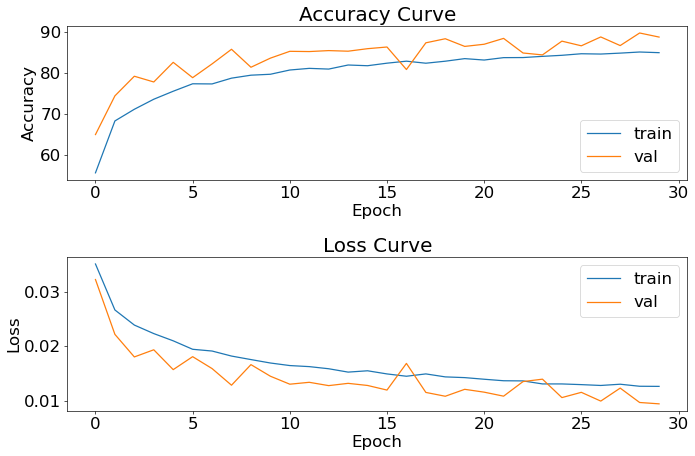

In [112]:
# 정확도(accuracy) 커브 시각화
plt.subplot(211)
plt.plot([i for i in range(epoch)], [i[0] for i in train_result])
plt.plot([i for i in range(epoch)], [i[0] for i in val_result])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])

# 손실(loss) 커브 시각화
plt.subplot(212)
plt.plot([i for i in range(epoch)], [i[1] for i in train_result])
plt.plot([i for i in range(epoch)], [i[1] for i in val_result])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val"])

plt.tight_layout()
plt.show()

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


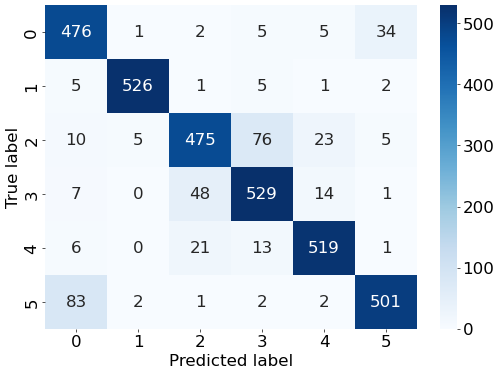

[ 각 클래스에 따른 정확도 ]
tensor([0.9101, 0.9741, 0.7997, 0.8831, 0.9268, 0.8477])
[ 전체 평균 정확도 ]
tensor(0.8882)


In [113]:
import pandas as pd
import seaborn as sns


net = ResNet18()
net = net.to(device)

file_name = "./checkpoint/ResNet18.pt"
checkpoint = torch.load(file_name)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>(알아보기) Input Mixup 살펴보기</b>

* Mixup은 대표적인 데이터 증진(data augmentation) 기법으로 정확도 향상에 도움이 됩니다.
    * 일반적으로 Mixup을 사용하는 경우 더 많은 횟수(1.5배가량)의 epoch이 요구됩니다.

In [114]:
mixup_alpha = 1.0


def mixup_data(x, y):
    lam = np.random.beta(mixup_alpha, mixup_alpha)
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).cuda()
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam


def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)


def train_with_mixup(net, epoch, optimizer, criterion, train_dataloader):
    print('[ Train epoch: %d ]' % epoch)
    net.train() # 모델을 학습 모드로 설정
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(train_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)
        inputs, targets_a, targets_b, lam = mixup_data(inputs, targets) # Mixup 진행
        optimizer.zero_grad() # 기울기(gradient) 초기화

        outputs = net(inputs) # 모델 입력하여 결과 계산
        loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam) # 손실(loss) 값 계산
        loss.backward() # 역전파를 통해 기울기(gradient) 계산

        optimizer.step() # 계산된 기울기를 이용해 모델 가중치 업데이트
        train_loss += loss.item()
        _, predicted = outputs.max(1)

        total += targets.size(0)
        correct += (lam * predicted.eq(targets_a).sum().item() + (1 - lam) * predicted.eq(targets_b).sum().item())

    print('Train accuarcy:', 100. * correct / total)
    print('Train average loss:', train_loss / total)
    return (100. * correct / total, train_loss / total)

#### <b>Problem 6. Mixup 결과 분석하기</b>

* Mixup을 사용하여 ResNet-18에 대하여 50번 epoch만큼 학습을 진행한 뒤에 성능이 얼마나 개선되었는지 쓰세요.
    * Mixup을 적용했을 때의 검증 정확도(validation accuracy): {0.8937, 0.8882에서 0.005 증가함}

In [115]:
import time
import torch.optim as optim


net = ResNet18()
net = net.to(device)

epoch = 50
learning_rate = 0.002
file_name = "ResNet18_Mixup.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train_with_mixup(net, i, optimizer, criterion, train_dataloader) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

[ Train epoch: 0 ]
Train accuarcy: 42.252314554825844
Train average loss: 0.04572250039629797
[ Validation epoch: 1 ]
Accuarcy: 66.92104490754329
Average loss: 0.0307189068872627
Model saved! (time elapsed: 19.120672464370728)
[ Train epoch: 1 ]
Train accuarcy: 51.67531503016223
Train average loss: 0.04076179128282093
[ Validation epoch: 2 ]
Accuarcy: 72.43909597886704
Average loss: 0.02596454659549589
Model saved! (time elapsed: 37.84776473045349)
[ Train epoch: 2 ]
Train accuarcy: 54.90696133403079
Train average loss: 0.03883927939808919
[ Validation epoch: 3 ]
Accuarcy: 75.84385089521574
Average loss: 0.02321364380482673
Model saved! (time elapsed: 56.584632873535156)
[ Train epoch: 3 ]
Train accuarcy: 55.29330945766697
Train average loss: 0.03858986488833434
[ Validation epoch: 4 ]
Accuarcy: 76.16671558555915
Average loss: 0.02243632860186515
Model saved! (time elapsed: 75.29286503791809)
[ Train epoch: 4 ]
Train accuarcy: 57.46668513373695
Train average loss: 0.03699241802856351
[

Train accuarcy: 66.49521974827354
Train average loss: 0.030058449112223874
[ Validation epoch: 37 ]
Accuarcy: 86.52773701203405
Average loss: 0.014268972992127264
Model saved! (time elapsed: 695.5924637317657)
[ Train epoch: 37 ]
Train accuarcy: 65.49550709497291
Train average loss: 0.030535445344450712
[ Validation epoch: 38 ]
Accuarcy: 87.46697974757852
Average loss: 0.014715533409434958
Model saved! (time elapsed: 714.3500392436981)
[ Train epoch: 38 ]
Train accuarcy: 66.22436797103946
Train average loss: 0.029646563776662468
[ Validation epoch: 39 ]
Accuarcy: 88.61168183152333
Average loss: 0.013145518623946313
Model saved! (time elapsed: 733.160849571228)
[ Train epoch: 39 ]
Train accuarcy: 65.69430546342467
Train average loss: 0.030323188902565953
[ Validation epoch: 40 ]
Accuarcy: 88.67038450249487
Average loss: 0.013289783050456213
Model saved! (time elapsed: 751.8976106643677)
[ Train epoch: 40 ]
Train accuarcy: 65.62541358323028
Train average loss: 0.030211067133222066
[ Vali

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


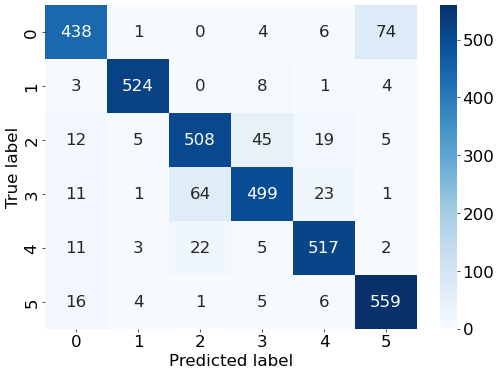

[ 각 클래스에 따른 정확도 ]
tensor([0.8375, 0.9704, 0.8552, 0.8331, 0.9232, 0.9459])
[ 전체 평균 정확도 ]
tensor(0.8937)


In [116]:
checkpoint = torch.load( './checkpoint/' + file_name)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>(알아보기) Transfer Learning 살펴보기</b>

* 전이 학습(Transfer Learning)은 <b>단기간에 우수한 정확도</b>를 얻기 위해 효과적으로 사용할 수 있는 기법입니다.
    * 본 실습에서는 미세 조정(fine-tuning) 기법을 사용합니다.
    * 적은 epoch만으로도 빠르게 수렴합니다.
* 전이 학습을 위해서는, 사전 학습된(pre-trained) 네트워크와 동일한 크기의 입력 차원을 갖도록 <b>데이터셋을 수정</b>해야 합니다.
    * ResNet 특성상 데이터셋 수정 없이도 동작할 수 있지만, 일반적으로 데이터셋을 수정합니다.
* (참고) [PyTorch 공식 Transfer Learning 튜토리얼](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)
* 기본적인 Transfer Learning을 이용해 91~93%의 정확도를 얻을 수 있습니다.

In [117]:
transforms_train_transferred = transforms.Compose([
    transforms.RandomResizedCrop((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_val_transferred = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset_transferred = datasets.ImageFolder(train_path, transforms_train_transferred)
val_dataset_transferred = datasets.ImageFolder(val_path, transforms_val_transferred)

train_dataloader_transferred = torch.utils.data.DataLoader(train_dataset_transferred, batch_size=16, shuffle=True, num_workers=2)
val_dataloader_transferred = torch.utils.data.DataLoader(val_dataset_transferred, batch_size=16, shuffle=True, num_workers=2)

print('Training dataset size:', len(train_dataset_transferred))
print('Validation dataset size:', len(val_dataset_transferred))

class_names = train_dataset_transferred.classes
print('Class names:', class_names)

Training dataset size: 13627
Validation dataset size: 3407
Class names: ['buildings', 'forests', 'glacier', 'mountains', 'sea', 'street']


In [118]:
net = torchvision.models.resnet18(pretrained=True)

# 마지막 레이어의 차원을 6차원으로 조절
num_features = net.fc.in_features
net.fc = nn.Linear(num_features, 6)
net = net.to(device)

epoch = 20
learning_rate = 0.001 # 일반적으로 fine-tuning을 진행할 때는 학습률(learning rate)을 낮게 설정
file_name = "ResNet18Transferred.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader_transferred) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader_transferred) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

C:\Users\USER\anaconda3\envs\SU\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\USER\anaconda3\envs\SU\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\USER/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:00<00:00, 55.0MB/s]


[ Train epoch: 0 ]
Train accuarcy: 77.03823291993835
Train average loss: 0.03869397601671366
[ Validation epoch: 1 ]
Accuarcy: 89.49222189609627
Average loss: 0.0191158252692499
Model saved! (time elapsed: 23.991670846939087)
[ Train epoch: 1 ]
Train accuarcy: 83.06303661847802
Train average loss: 0.029653751360840395
[ Validation epoch: 2 ]
Accuarcy: 91.4587613736425
Average loss: 0.01566565146115927
Model saved! (time elapsed: 48.02239108085632)
[ Train epoch: 2 ]
Train accuarcy: 84.80956923754312
Train average loss: 0.026418098645551176
[ Validation epoch: 3 ]
Accuarcy: 91.2826533607279
Average loss: 0.015993290966513887
Model saved! (time elapsed: 71.94815373420715)
[ Train epoch: 3 ]
Train accuarcy: 85.44066925955823
Train average loss: 0.024623928532423168
[ Validation epoch: 4 ]
Accuarcy: 90.43146463164074
Average loss: 0.018219656448200068
Model saved! (time elapsed: 96.12507152557373)
[ Train epoch: 4 ]
Train accuarcy: 86.34328905848683
Train average loss: 0.022932078576159247

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


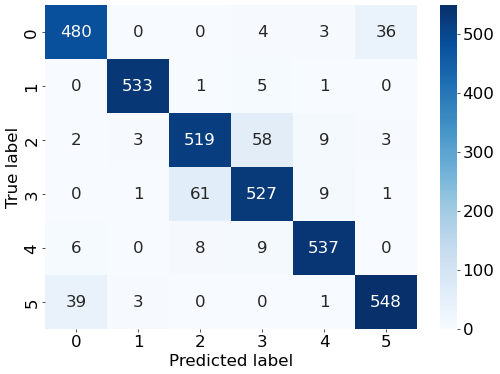

[ 각 클래스에 따른 정확도 ]
tensor([0.9178, 0.9870, 0.8737, 0.8798, 0.9589, 0.9272])
[ 전체 평균 정확도 ]
tensor(0.9228)


In [122]:
checkpoint = torch.load( './checkpoint/ResNet18Transferred.pt')
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader_transferred)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>Problem 7. State-of-the-Art 성능 만들기</b>

* SOTA 수준의 성능을 만들어 보세요.
* (참고) Transfer Learning과 Mixup을 함께 사용해 보세요.
    * 더 큰 규모의 사전 학습된 모델(ResNet-50 이상)을 이용해 보세요.
* (참고) learning rate scheduler를 사용해 보세요.

<pre>
def adjust_learning_rate(optimizer, epoch):
    lr = learning_rate
    if epoch >= 20:
        lr /= 8
    if epoch >= 40:
        lr /= 8
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
</pre>

* 대회(competition)에 참여하고 있다고 생각하고, <b>94% 이상의 정확도</b>를 만들어 보세요.
    * 내 모델의 검증 정확도(validation accuracy): {답을 쓰세요.}


In [152]:
net = torchvision.models.resnet18(pretrained=True)

# 마지막 레이어의 차원을 6차원으로 조절
num_features = net.fc.in_features
net.fc = nn.Linear(num_features, 6)
net = net.to(device)

epoch = 50
learning_rate = 0.001 
file_name = "ResNet18Transferred_mixup.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.125)
scheduler1 = optim.lr_scheduler.MultiStepLR(optimizer, milestones=np.arange(20,epoch), gamma=0.125)
scheduler2 = optim.lr_scheduler.MultiStepLR(optimizer, milestones=np.arange(40,epoch), gamma=0.125)
train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train_with_mixup(net, i, optimizer, criterion, train_dataloader_transferred) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader_transferred) # 검증(validation)
    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')
#     scheduler.step()
    scheduler1.step()
    scheduler2.step()

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

C:\Users\USER\anaconda3\envs\SU\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\USER\anaconda3\envs\SU\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[ Train epoch: 0 ]
Train accuarcy: 50.304892767307386
Train average loss: 0.0836174698851206
[ Validation epoch: 1 ]
Accuarcy: 68.2418550044027
Average loss: 0.05932050257580071
Model saved! (time elapsed: 28.340721130371094)
[ Train epoch: 1 ]
Train accuarcy: 55.53035101950243
Train average loss: 0.07694391626215405
[ Validation epoch: 2 ]
Accuarcy: 77.92779571470501
Average loss: 0.04387882904709697
Model saved! (time elapsed: 56.340686082839966)
[ Train epoch: 2 ]
Train accuarcy: 57.02766901762971
Train average loss: 0.07533133683414954
[ Validation epoch: 3 ]
Accuarcy: 77.7810390372762
Average loss: 0.04377543549226952
Model saved! (time elapsed: 84.33838534355164)
[ Train epoch: 3 ]
Train accuarcy: 57.786791942463715
Train average loss: 0.0739201853501348
[ Validation epoch: 4 ]
Accuarcy: 78.25066040504844
Average loss: 0.04169015243916278
Model saved! (time elapsed: 112.60971331596375)
[ Train epoch: 4 ]
Train accuarcy: 57.79591274416096
Train average loss: 0.07406187832569826
[ 

Train accuarcy: 65.89429458472371
Train average loss: 0.061720577833053604
[ Validation epoch: 37 ]
Accuarcy: 89.11065453478133
Average loss: 0.02552995119393659
Model saved! (time elapsed: 1041.885535478592)
[ Train epoch: 37 ]
Train accuarcy: 65.00502495134286
Train average loss: 0.06280101604451872
[ Validation epoch: 38 ]
Accuarcy: 89.16935720575286
Average loss: 0.02556565601191704
Model saved! (time elapsed: 1070.1575677394867)
[ Train epoch: 38 ]
Train accuarcy: 64.9684657934774
Train average loss: 0.06289892881144218
[ Validation epoch: 39 ]
Accuarcy: 89.28676254769591
Average loss: 0.025159388395709168
Model saved! (time elapsed: 1098.474978685379)
[ Train epoch: 39 ]
Train accuarcy: 65.91937735709375
Train average loss: 0.061785643635855
[ Validation epoch: 40 ]
Accuarcy: 89.11065453478133
Average loss: 0.025208910382105383
Model saved! (time elapsed: 1126.632169008255)
[ Train epoch: 40 ]
Train accuarcy: 65.4174046632454
Train average loss: 0.062472516248867745
[ Validation 

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


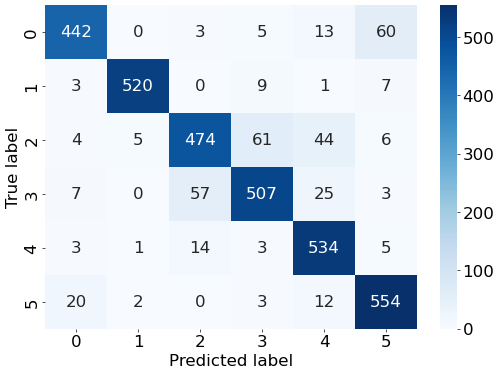

[ 각 클래스에 따른 정확도 ]
tensor([0.8451, 0.9630, 0.7980, 0.8464, 0.9536, 0.9374])
[ 전체 평균 정확도 ]
tensor(0.8896)


In [153]:
checkpoint = torch.load( './checkpoint/ResNet18Transferred_mixup.pt')
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader_transferred)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())